In [ ]:
!pip install pydotplus
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 714 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=8fc5bfa61ef8553089f6427cddc49feab6cc66f9ec41effbfd11d86f5d378149
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from statistics import mode


In [ ]:
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from scipy.stats import normaltest

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving bdpredicao.xlsx to bdpredicao.xlsx


In [ ]:
df = pd.read_excel(next(iter(uploaded.keys())))


In [ ]:


le = preprocessing.LabelEncoder()


In [ ]:
df['pf_ou_pj'].isnull().sum()


0

In [ ]:
df['competencia'].isnull().sum()

0

Registros sem nacionalidade foram setados com a moda 

In [ ]:
df['nacionalidade'].fillna(('Brasileiro(a)'), inplace=True)

In [ ]:
df['especialidade'].fillna(('Sem Especialidade'), inplace=True)


In [ ]:
df['situacao_epoca_do_repasse'].isnull().sum()

0

In [ ]:
df['hospital'].isnull().sum()

5436

In [ ]:
df['hospital'].fillna(('Sem Hospital'), inplace=True)

In [ ]:
df['estado_civil'].fillna(('Sem'), inplace=True)

Registros sem grau de instrução se referem a cadastros de empresas.
Será adotado um ítem pj nesse caso.

In [ ]:

df['grau_instrucao'].fillna(('pj'), inplace=True)

In [ ]:
df_grafico = df.copy()

In [ ]:
def generate_labelencoder(atts):
  for attr in atts:
    df_grafico[attr] = le.fit_transform(df_grafico[attr])
  return df_grafico

In [ ]:

df_grafico  = generate_labelencoder(['pf_ou_pj','grau_instrucao','competencia','hospital','especialidade','estado_civil','nacionalidade','situacao_epoca_do_repasse'])

In [ ]:
df_grafico = df_grafico.drop(['id_cooperado'], axis=1)

In [ ]:
df_grafico

,pf_ou_pj,especialidade,competencia,nacionalidade,situacao_epoca_do_repasse,hospital,estado_civil,grau_instrucao,cooperado_origem_de_conversao,cooperado_destino_de_conversao,participa_servico_especial,valor_procedimento_a_repassar,valor_lancamento_eventual_a_repassar,valor_predicao_liquido
0,0,27,0,2,6,11,6,2,0,0,0,0.0,0.0,0.0
1,0,27,1,2,6,11,6,2,0,0,0,0.0,0.0,0.0
2,0,27,2,2,6,11,6,2,0,0,0,0.0,0.0,0.0
3,0,27,3,2,6,11,6,2,0,0,0,0.0,0.0,0.0
4,0,27,4,2,6,11,6,2,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74479,0,43,13,2,0,5,0,2,0,0,0,0.0,0.0,0.0
74480,0,43,14,2,0,5,0,2,0,0,0,0.0,0.0,0.0
74481,0,43,15,2,0,5,0,2,0,0,0,0.0,0.0,0.0
74482,0,43,16,2,0,5,0,2,0,0,0,0.0,0.0,0.0


In [ ]:
df['valor_total'] = df['valor_procedimento_a_repassar']+df['valor_lancamento_eventual_a_repassar']


In [ ]:
df_grafico['valor_total'] = df_grafico['valor_procedimento_a_repassar']+df_grafico['valor_lancamento_eventual_a_repassar']


In [ ]:
df_grafico = df_grafico.drop(['valor_lancamento_eventual_a_repassar'], axis=1)
df_grafico = df_grafico.drop(['valor_procedimento_a_repassar'], axis=1)

In [ ]:
df = df.drop(['valor_lancamento_eventual_a_repassar'], axis=1)
df = df.drop(['valor_procedimento_a_repassar'], axis=1)


In [ ]:
df_grafico['vai_receber'] = np.where(df_grafico['valor_predicao_liquido'] > 0.0000000001, 1, 0) 

In [ ]:
print('A Moda é ',df['pf_ou_pj'].mode())
df['pf_ou_pj'].describe()

A Moda é  0    pf
dtype: object


count     74484
unique        2
top          pf
freq      69264
Name: pf_ou_pj, dtype: object

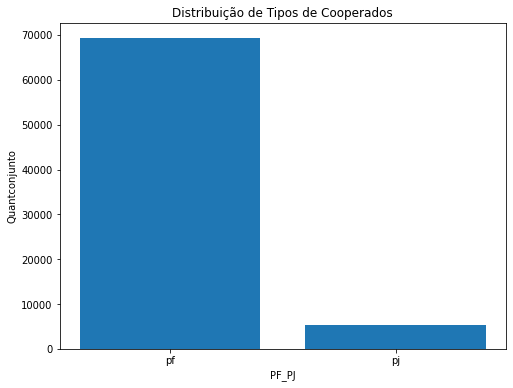

In [ ]:
conjunto = df['pf_ou_pj']
conjunto_sum = conjunto.value_counts()
conjunto_sum = conjunto_sum.sort_index()
x = conjunto_sum.index
y = conjunto_sum
plt.figure(figsize=(8, 6))
plt.bar(x, y)

plt.title('Distribuição de Tipos de Cooperados')
plt.xlabel('PF_PJ')
plt.ylabel('Quantconjunto')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df['especialidade'].mode())
df['especialidade'].describe()

A Moda é  0    Médico clínico
dtype: object


count              74484
unique                72
top       Médico clínico
freq               14850
Name: especialidade, dtype: object

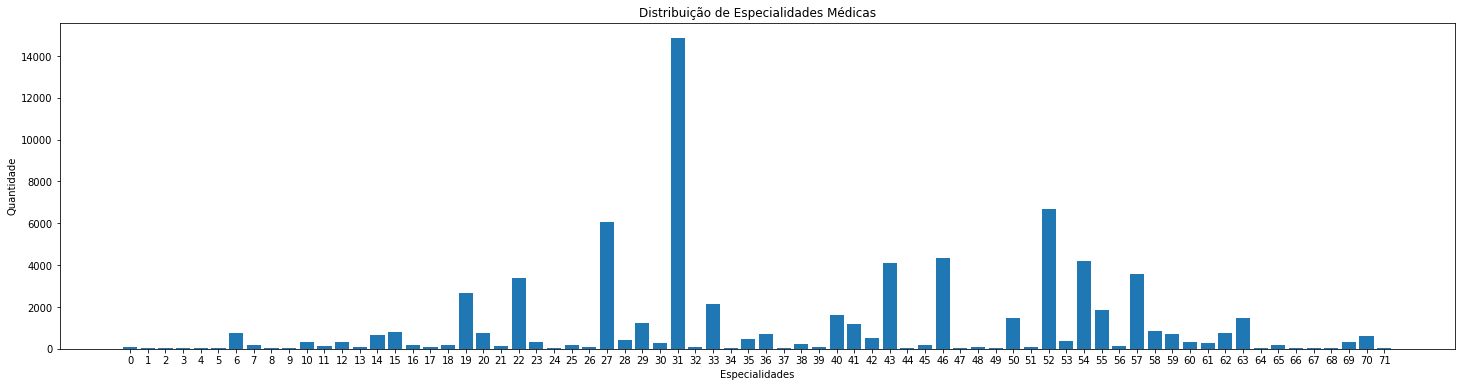

In [ ]:
especialidade = df_grafico['especialidade']
especialidade_sum = especialidade.value_counts()
especialidade_sum = especialidade_sum.sort_index()
x = especialidade_sum.index
y = especialidade_sum
plt.figure(figsize=(25, 6))
plt.bar(x, y)

plt.title('Distribuição de Especialidades Médicas')
plt.xlabel('Especialidades')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df_grafico['nacionalidade'].mode())
df_grafico['nacionalidade'].describe()
especialidade = df['nacionalidade']
especialidade_sum = especialidade.value_counts()
especialidade_sum = especialidade_sum.sort_index()
print (especialidade_sum)

A Moda é  0    2
dtype: int64
Alemã(ão)           18
Boliviano(a)       108
Brasileiro(a)    74178
Colombiano(a)       54
Cubano(a)           18
Iraquiano(a)        18
Peruano(a)          90
Name: nacionalidade, dtype: int64


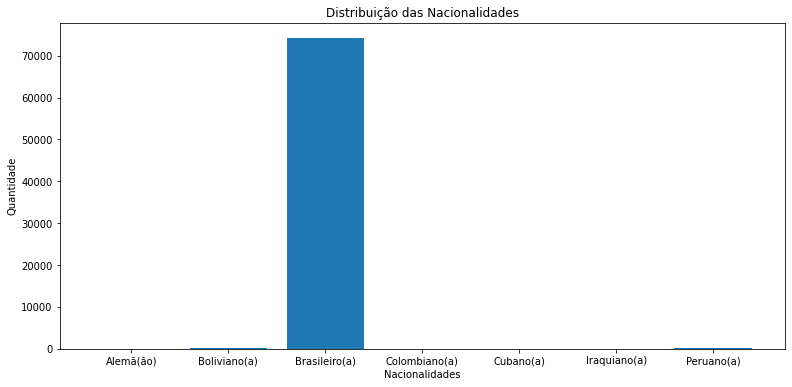

In [ ]:
nacionalidade = df_grafico['nacionalidade']
nacionalidade_sum = especialidade.value_counts()
nacionalidade_sum = nacionalidade_sum.sort_index()
x = nacionalidade_sum.index
y = nacionalidade_sum
plt.figure(figsize=(13, 6))
plt.bar(x, y)

plt.title('Distribuição das Nacionalidades')
plt.xlabel('Nacionalidades')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df['situacao_epoca_do_repasse'].mode())
df_grafico['situacao_epoca_do_repasse'].describe()
data = df['situacao_epoca_do_repasse']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    ATIVO
dtype: object
ATIVO         31995
DEMITIDO        161
ELIMINADO       890
EXCLUÍDO       1487
FALECIDO         18
INATIVO       11439
LICENCIADO    28494
Name: situacao_epoca_do_repasse, dtype: int64


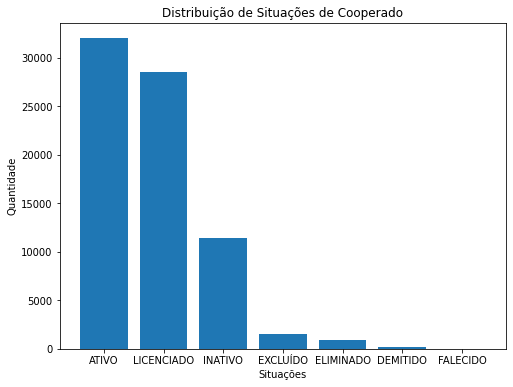

In [ ]:
df_data = df['situacao_epoca_do_repasse']
data_sum = df_data.value_counts()
data_sum = data_sum.sort_index()
x = data_sum.sort_values(ascending=False).index
y = data_sum.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(x, y)

plt.title('Distribuição de Situações de Cooperado')
plt.xlabel('Situações')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df['hospital'].mode())
df_grafico['hospital'].describe()
data = df['hospital']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    P ATENDIMENTO
dtype: object
BALEIA              3456
BIOVISAOCENTESP       18
CEM                10638
CLINICA MAIS         414
CLÍNICA OLHOS       2772
CONSULTORIOS        8712
HOSPSAOLUCAS        6426
IPSEMG/HSL          8568
LABORATÓRIOS         576
LITHOCENTRO           54
MATERDEICONTORN       18
P ATENDIMENTO      17316
PINEL                 36
SANTA FÉ              18
SANTCASBH           7884
SLPT/HSL            1404
SOMG                 684
Sem Hospital        5436
UROMASTER             18
VERA CRUZ             36
Name: hospital, dtype: int64


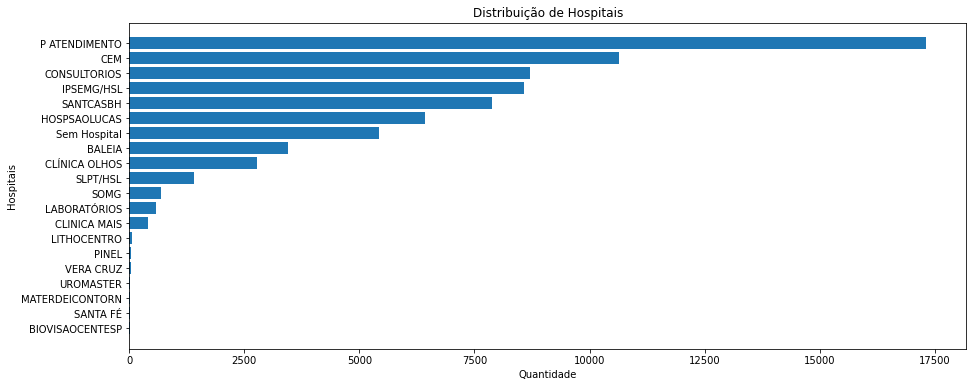

In [ ]:
df_data = df['hospital']
data_sum = df_data.value_counts()
data_sum = data_sum.sort_index()

x = data_sum.sort_values(ascending=True).index
y = data_sum.sort_values(ascending=True)
plt.figure(figsize=(15, 6))
plt.barh(x, y)

plt.title('Distribuição de Hospitais')
plt.xlabel('Quantidade')
plt.ylabel('Hospitais')

plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df['estado_civil'].mode())
df_grafico['estado_civil'].describe()
data = df['estado_civil']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    Solteiro
dtype: object
Casado                    29556
Desquitado (a)              918
Divorciado                 1386
Marital                      36
Sem                        6660
Separado judicialmente      396
Solteiro                  35244
União estável               126
Viúvo (a)                   162
Name: estado_civil, dtype: int64


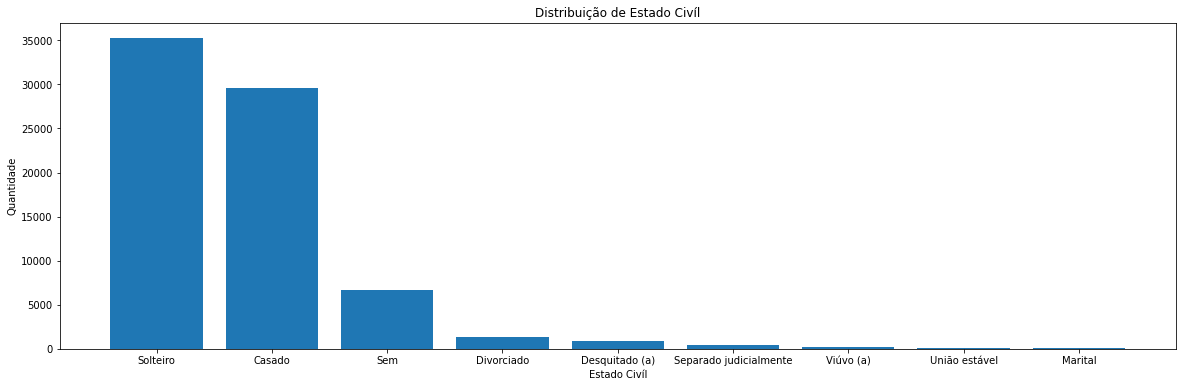

In [ ]:
df_data = df['estado_civil']
data_sum = df_data.value_counts()
data_sum = data_sum.sort_index()
x = data_sum.sort_values(ascending=False).index
y = data_sum.sort_values(ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(x, y)

plt.title('Distribuição de Estado Civíl')
plt.xlabel('Estado Civíl')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

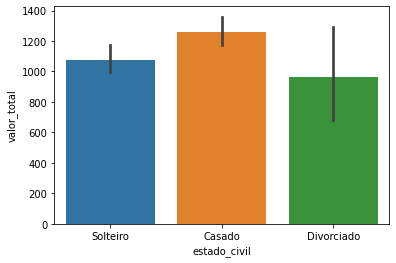

In [ ]:
values=['Solteiro','Casado','Divorciado']
df_teste2 = df[df.estado_civil.isin(values)]
#df_teste2 = df_teste2[df_teste2.valor_total>0]
df_teste2 = df_teste2[df_teste2.pf_ou_pj=='pf']

#sns.catplot(x='estado_civil',y='valor_total',kind='violin',data=df_teste2, height=8.27, aspect=11.7/8.27)
#sns.boxplot(x='estado_civil',y='valor_total',data=df_teste2)
sns.barplot(x='estado_civil',y='valor_total',data=df_teste2);

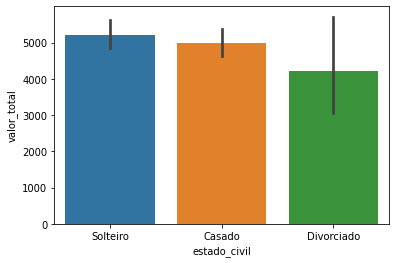

In [ ]:
values=['Solteiro','Casado','Divorciado']
df_teste2 = df[df.estado_civil.isin(values)]
df_teste2 = df_teste2[df_teste2.valor_total>0]
df_teste2 = df_teste2[df_teste2.pf_ou_pj=='pf']

#sns.catplot(x='estado_civil',y='valor_total',kind='violin',data=df_teste2, height=8.27, aspect=11.7/8.27)
#sns.boxplot(x='estado_civil',y='valor_total',data=df_teste2)
sns.barplot(x='estado_civil',y='valor_total',data=df_teste2)

In [ ]:
from scipy.stats import f
def T2Hotelling_duas_amostras(df1, df2, delta0):
    n1 = len(df1)
    n2 = len(df2)
    p = len(df1.columns)
    Xbarra1=df1.mean()
    Xbarra2=df2.mean()
    S1 = df1.cov()
    S2 = df2.cov()
    S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)
    S_pooled_inv = np.linalg.inv(S_pooled)
    
    T2Hotelling_duas_amostras = np.array(Xbarra1-Xbarra2-delta0).T.dot(S_pooled_inv).dot(np.array(Xbarra1-Xbarra2-delta0)) / (n1+n2-2)
    qf = f.ppf(0.95, p , (n1+n2-2), loc=0, scale=1)
    teste = T2Hotelling_duas_amostras > (n1+n2-2) * p / (n1+n2-p-1) * qf
    pvalor = 1-f.cdf(T2Hotelling_duas_amostras/((n1+n2-2) * p / (n1+n2-p-1) ), p, (n1+n2-2))
    print('Rejeitamos H0') if teste else print('Não rejeitamos H0')
    print('Valor da estatística', T2Hotelling_duas_amostras)
    print('valor p', pvalor)

In [ ]:
df_amostra = df_teste2.sample(int(len(df_teste2)*10/100))
df_amostra_casado = pd.DataFrame(data=df_amostra.iloc[:,-1][df_amostra['estado_civil']=='Casado'], columns=['valor_total'])
df_amostra_solteiro = pd.DataFrame(data=df_amostra.iloc[:,-1][df_amostra['estado_civil']=='Solteiro'], columns=['valor_total'])
df_casado = pd.DataFrame(data=df_teste2.iloc[:,-1][df_teste2['estado_civil']=='Casado'], columns=['valor_total'])
df_solteiro = pd.DataFrame(data=df_teste2.iloc[:,-1][df_teste2['estado_civil']=='Solteiro'], columns=['valor_total'])          

In [ ]:
S1 = df_casado.cov()
n1 = len(df_amostra_casado)
Xbarra1 = df_amostra_casado.mean()
S1

,valor_total
valor_total,2.498547e+08


In [ ]:
S2 = df_solteiro.cov()
n2 = len(df_amostra_solteiro)
Xbarra2 = df_amostra_solteiro.mean()
S2

,valor_total
valor_total,3.251756e+08


In [ ]:

T2Hotelling_duas_amostras(df_amostra_casado,df_amostra_solteiro,[0])

Não rejeitamos H0
Valor da estatística 5.092054234644371e-07
valor p 0.9994307376336385


In [ ]:
print('A Moda é ',df['grau_instrucao'].mode())
df_grafico['grau_instrucao'].describe()
data = df['grau_instrucao']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    Superior
dtype: object
Doutorado     1998
Mestrado      2808
Superior     64476
pj            5202
Name: grau_instrucao, dtype: int64


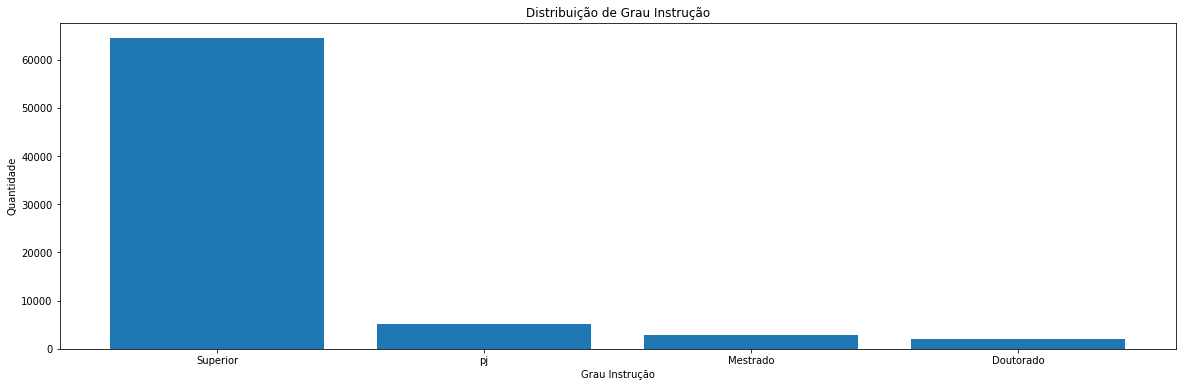

In [ ]:
df_data = df['grau_instrucao']
data_sum = df_data.value_counts()
data_sum = data_sum.sort_index()
x = data_sum.sort_values(ascending=False).index
y = data_sum.sort_values(ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(x, y)

plt.title('Distribuição de Grau Instrução')
plt.xlabel('Grau Instrução')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

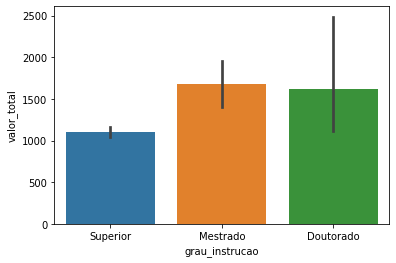

In [ ]:
values=['Superior','Mestrado','Doutorado']
df_teste2 = df[df.grau_instrucao.isin(values)]
#df_teste2 = df_teste2[df_teste2.valor_total>0]
df_teste2 = df_teste2[df_teste2.pf_ou_pj=='pf']

sns.barplot(x='grau_instrucao',y='valor_total',data=df_teste2)

In [ ]:
print('A Moda é ',df_grafico['cooperado_origem_de_conversao'].mode())
df_grafico['cooperado_origem_de_conversao'].describe()
data = df['cooperado_origem_de_conversao']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    0
dtype: int64
0    65412
1     9072
Name: cooperado_origem_de_conversao, dtype: int64


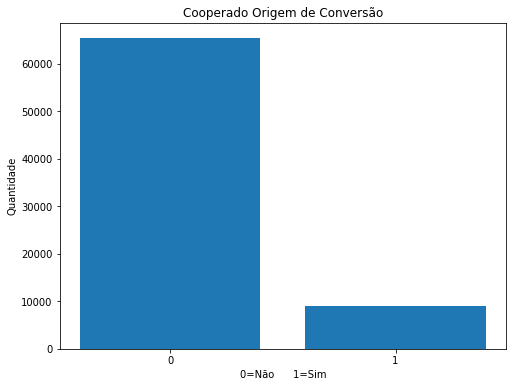

In [ ]:
idade = df['cooperado_origem_de_conversao']
idade_sum = idade.value_counts()
idade_sum = idade_sum.sort_index()
x = idade_sum.index
y = idade_sum
plt.figure(figsize=(8, 6))
plt.bar(x, y)

plt.title('Cooperado Origem de Conversão')
plt.xlabel('0=Não      1=Sim')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df_grafico['cooperado_destino_de_conversao'].mode())
df_grafico['cooperado_destino_de_conversao'].describe()
data = df['cooperado_destino_de_conversao']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    0
dtype: int64
0    71172
1     3312
Name: cooperado_destino_de_conversao, dtype: int64


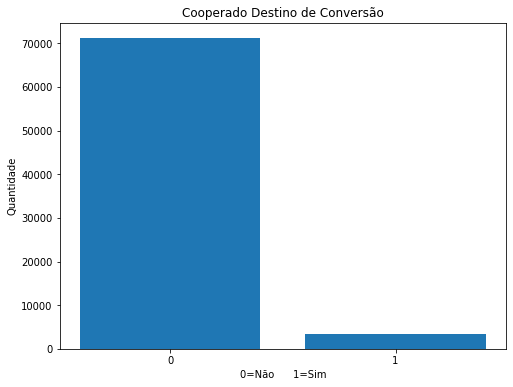

In [ ]:
idade = df['cooperado_destino_de_conversao']
idade_sum = idade.value_counts()
idade_sum = idade_sum.sort_index()
x = idade_sum.index
y = idade_sum
plt.figure(figsize=(8, 6))
plt.bar(x, y)

plt.title('Cooperado Destino de Conversão')
plt.xlabel('0=Não      1=Sim')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
print('A Moda é ',df_grafico['participa_servico_especial'].mode())
df_grafico['participa_servico_especial'].describe()
data = df['participa_servico_especial']
data_sum = data.value_counts()
data_sum = data_sum.sort_index()
print (data_sum)

A Moda é  0    0
dtype: int64
0    73980
1      504
Name: participa_servico_especial, dtype: int64


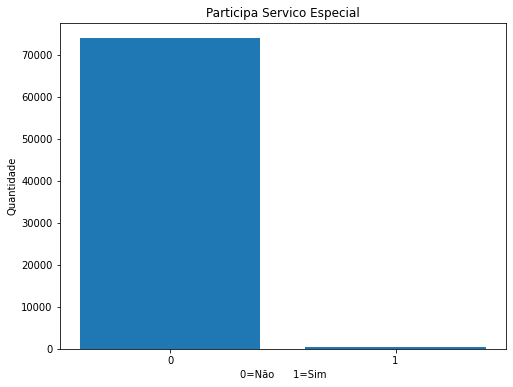

In [ ]:
idade = df['participa_servico_especial']
idade_sum = idade.value_counts()
idade_sum = idade_sum.sort_index()
x = idade_sum.index
y = idade_sum
plt.figure(figsize=(8, 6))
plt.bar(x, y)

plt.title('Participa Servico Especial')
plt.xlabel('0=Não      1=Sim')
plt.ylabel('Quantidade')
plt.xticks(x) # obriga a mostrar todos os números no eixo x
plt.savefig('diagrama-barras.png')
plt.show()

In [ ]:
df['valor_total'].describe()

count     74484.000000
mean       1710.671605
std       14047.102956
min        -164.740000
25%           0.000000
50%           0.000000
75%           0.000000
max      958528.490000
Name: valor_total, dtype: float64

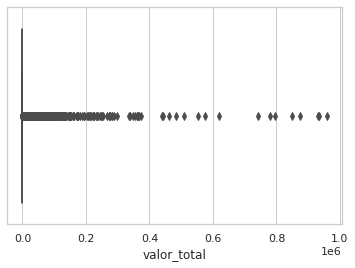

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df["valor_total"])

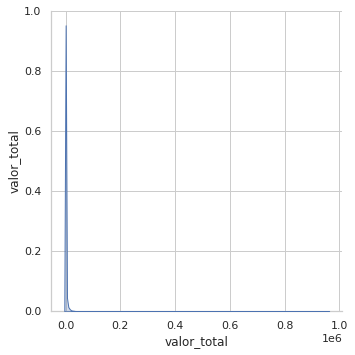

In [ ]:
sns.pairplot(df[["valor_total"]], diag_kind="kde",height=5)

In [ ]:
from scipy.stats import normaltest

In [ ]:
normaltest(df_grafico['valor_total'])

NormaltestResult(statistic=206324.4986078155, pvalue=0.0)

In [ ]:
stat_test, p_valor = normaltest(df_grafico['valor_total'])
print(stat_test)
print(p_valor)

206324.4986078155
0.0


In [ ]:
significancia = 0.05
print('Rejeitamos H0') if p_valor <= significancia else print('Não rejeitamos H0')

Rejeitamos H0


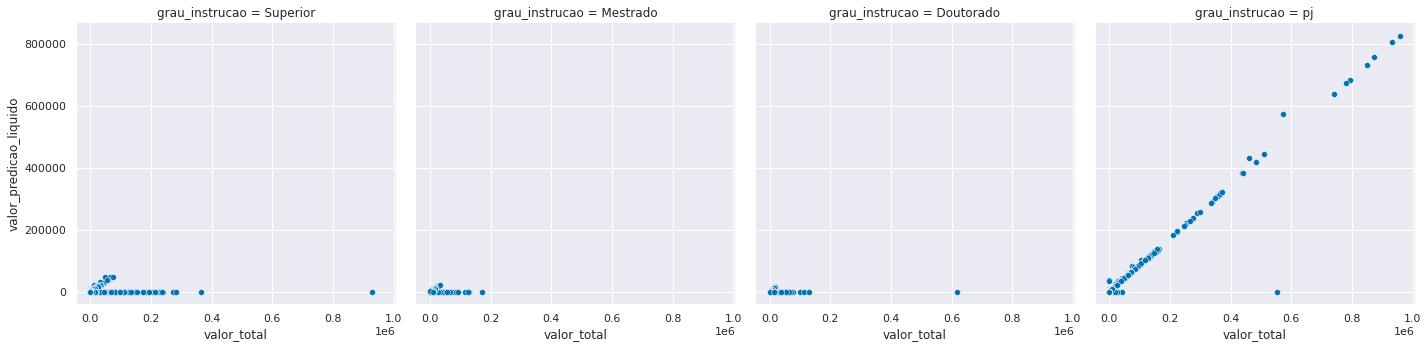

In [ ]:
sns.set_palette('colorblind')
sns.relplot(x='valor_total',col='grau_instrucao',y='valor_predicao_liquido',data=df)

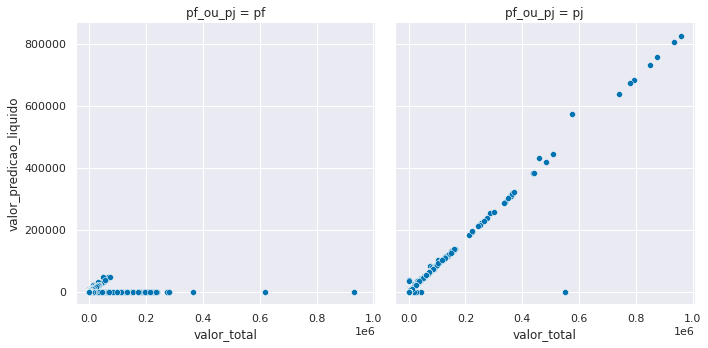

In [ ]:

sns.relplot(x='valor_total',col='pf_ou_pj',y='valor_predicao_liquido',data=df)

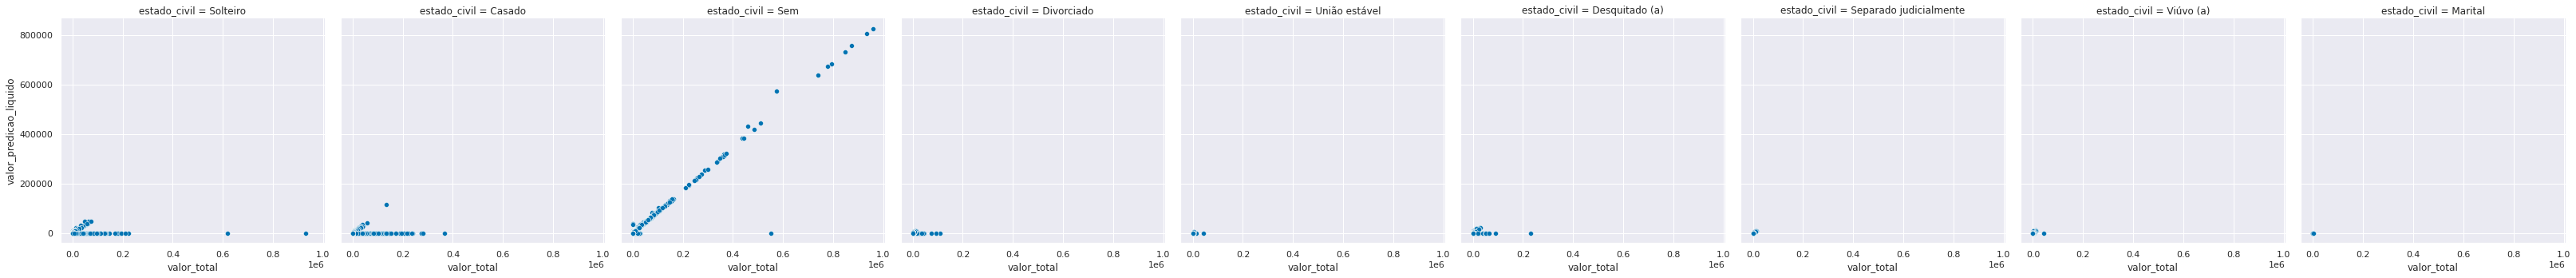

In [ ]:

sns.relplot(x='valor_total',col='estado_civil',y='valor_predicao_liquido',data=df)

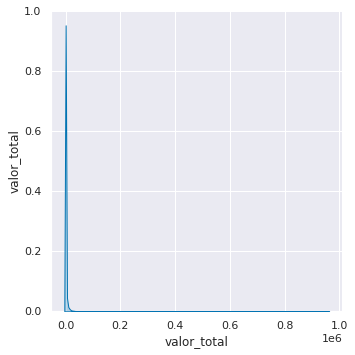

In [ ]:
sns.pairplot(df_grafico[["valor_total"]], diag_kind="kde",height=5)

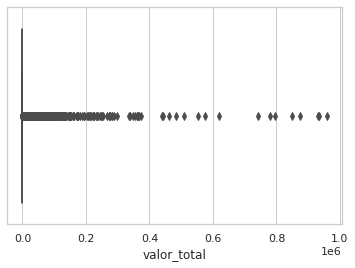

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_grafico["valor_total"])

In [ ]:
df_com_valor=df_grafico[df_grafico['valor_predicao_liquido']>0]

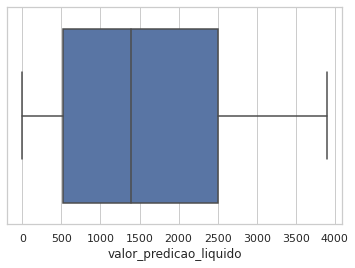

In [ ]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_com_valor["valor_predicao_liquido"][df_com_valor['pf_ou_pj']==1][df_com_valor['valor_predicao_liquido']<3900])

In [ ]:
df_com_valor["valor_predicao_liquido"][df_com_valor['pf_ou_pj']==1].describe()

count      2190.000000
mean      19076.818895
std       55171.988925
min           0.220000
25%        1858.282500
50%        6140.505000
75%       16876.967500
max      826163.190000
Name: valor_predicao_liquido, dtype: float64

In [ ]:
df_com_valor2=df_com_valor[df_com_valor['pf_ou_pj']==0][df_com_valor['valor_predicao_liquido']<4000]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


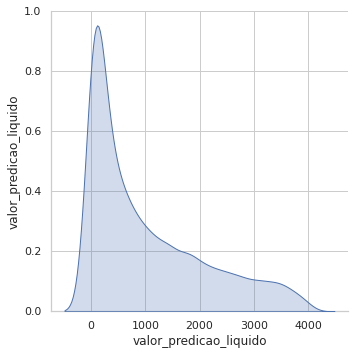

In [ ]:
sns.pairplot(df_com_valor2[["valor_predicao_liquido"]], diag_kind="kde",height=5)